https://www.researchgate.net/publication/272351873_NumPy_SciPy_Recipes_for_Data_Science_k-Medoids_Clustering


In [16]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import scipy.spatial as spt
import random
import math

In [17]:
def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape
    # randomly initialize an array of k medoid indices
    M = np.sort(np.random.choice(n, k))
    # create a copy of the array of medoid indices
    Mnew = np.copy(M)
    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i.e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
       
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)

        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:#this is only perfomed in case the for has been fully executed. If there is a break, it is not executed.
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
    # return results
    return M, C

Ejemplo de extracción de medoide

In [18]:
mean = np.array([0., 0.])
Cov = np.array([[1., 0.], [0., 1.]])
X = rnd.multivariate_normal(mean, Cov, 100).T

In [19]:
mu = np.mean(X, axis=1)

In [20]:
def squaredEDM(X):
    V = spt.distance.pdist(X.T, 'sqeuclidean')
    return spt.distance.squareform(V)

In [21]:
D = squaredEDM(X)

In [22]:
#argmin de numpy devuelve el índice del mínimo valor a lo largo del eje indicado como argumento de entrada
j = np.argmin(np.mean(D, axis=1))
me = X[:,j]
#me es un  medoide: es aquel punto que minimiza la distancia cuadrática a todos los puntos del cluster

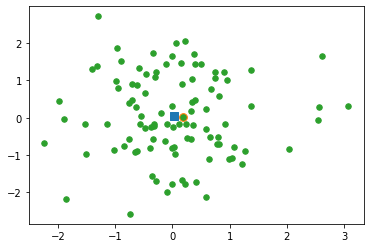

In [23]:
plt.scatter(mu[0], mu[1], marker='s', s=60)
plt.scatter(me[0], me[1], marker='o', s=60)
plt.scatter(X[0,:], X[1,:], s=30)
plt.show()

In [24]:
x = []
y = []
x1 = []
y1 = []
for i in range(1,551):
    aux = random.gauss(0,1)
    x.append(aux)
    aux = random.gauss(0,1)
    y.append(aux)
    #para la segunda población hacemos que las muestras se distribuyan
    #en el entorno de la circunferencia de radio 5 (de acuerdo con una distribucion gausiana)
    r = random.gauss(5,0.25)
    #Los puntos aleatorios son generados de acuerdo con una representación polar 
    #p=(r*cos(angulo),r*sin(angulo)). r se escoge a partir de una distribución gausiana de media 
    #5 y varianza 0.25. El ángulo, por su parte, se genera aleatoriamente según un distribución
    #uniforme en [0,2pi]
    theta = random.uniform(0,2*math.pi)
    x1.append(r*math.cos(theta))
    y1.append(r*math.sin(theta))

x = np.array(x)
y = np.array(y)
data = np.vstack((x,y)).T
x1 = np.array(x1)
y1 = np.array(y1)
data1 = np.vstack((x1,y1)).T
data1 = np.concatenate((data,data1))
#np.random.shuffle(data1)

In [25]:
data1.shape

(1100, 2)

Calculamos la matriz de distancias

In [26]:
D = squaredEDM(data1.T)
print(D.shape)
M, C = kMedoids(D, k=2)

(1100, 1100)


In [27]:
type(C)

dict

In [28]:
print(data1 [M,:])

[[ 0.78124677 -0.46275469]
 [-4.18880898  1.83986686]]


In [29]:
C[0].shape

(852,)

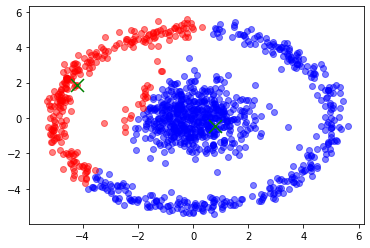

In [30]:
plt.scatter(data1[C[0],0],data1[C[0],1],color='b',alpha=0.5)
plt.scatter(data1[C[1],0],data1[C[1],1],color='r',alpha=0.5)
plt.scatter(data1[M,0],data1[M,1],marker='x',s=169,linewidths=3,color='g',zorder=10)
plt.show()